<a href="https://colab.research.google.com/github/sakshantG/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member       -** **Sakshant Gongal**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import datetime as dt
from numpy import math
from pylab import rcParams

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
df = pd.read_excel("/content/drive/MyDrive/Online Retail.xlsx")

In [4]:
# copying the original dataset
data = df.copy()

### Dataset First View

In [5]:
# Dataset First Look
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
# computing number of rows
rows = len(data.axes[0])
 
# computing number of columns
cols = len(data.axes[1])
 
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  541909
Number of Columns:  8


### Dataset Information

In [8]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [9]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [10]:
# deleting duplicated values from dataset
#data = data.drop_duplicates()

In [11]:
#data.duplicated().sum()

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
# Count total NaN at each row in a DataFrame
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

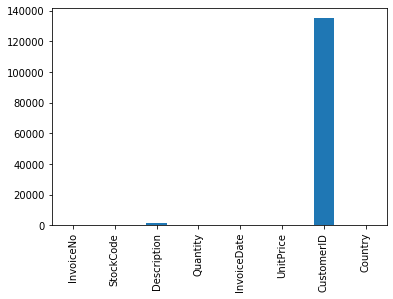

In [13]:
# Visualizing the missing values
data.isnull().sum().plot(kind = 'bar')

### What did you know about your dataset?

### **There are null values present in our dataset like in CustomerID and Description**

In [14]:
# deleting the null values 
data.dropna(inplace =True)

In [15]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
data.shape

(406829, 8)

### **After removeing null value in our dataset .it reduces to (406829, 8)**

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:
# Dataset Describe
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


## **Variables Description** 

## **Attribute Information:**
**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country:** Country name. Nominal, the name of the country where each customer resides.

## **Need to drop some InvoiceNo which are starts with 'C',  because 'C' indicates a cancellation**

In [19]:
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

In [20]:
data=data[~data['InvoiceNo'].str.contains('C')]

In [21]:
data.shape

(397924, 8)

In [22]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


### Check Unique Values for each variable.

In [23]:
# Check Unique Values for each variable.
data.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [25]:
Description_df = data['Description'].value_counts().reset_index()
Description_df.rename(columns={'index' : 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description' : 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [26]:
Description_df.tail()

,Description_Name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


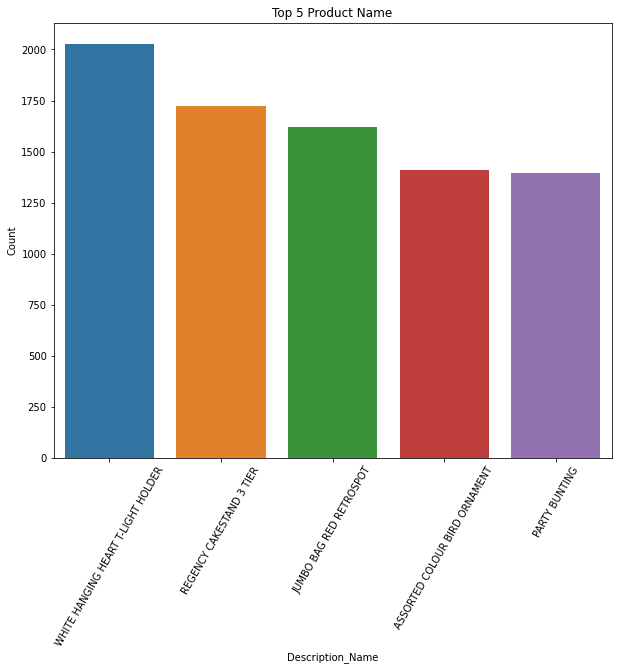

In [27]:
# Chart - 1 Plot of Top 5 Product Name
plt.figure(figsize=(10,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])
plt.xticks(rotation=60)
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.

##### 2. What is/are the insight(s) found from the chart?

**Top product based on maximum selling are :**

1.WHITE HANGING HEART T-LIGHT HOLDER

2.REGENCY CAKESTAND 3 TIER

3.JUMBO BAG RED RETROSPOT

4.PARTY BUNTING

5.LUNCH BAG RED RETROSPOT

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, above bar-plot helps creating positive business impact.

#### Chart - 2

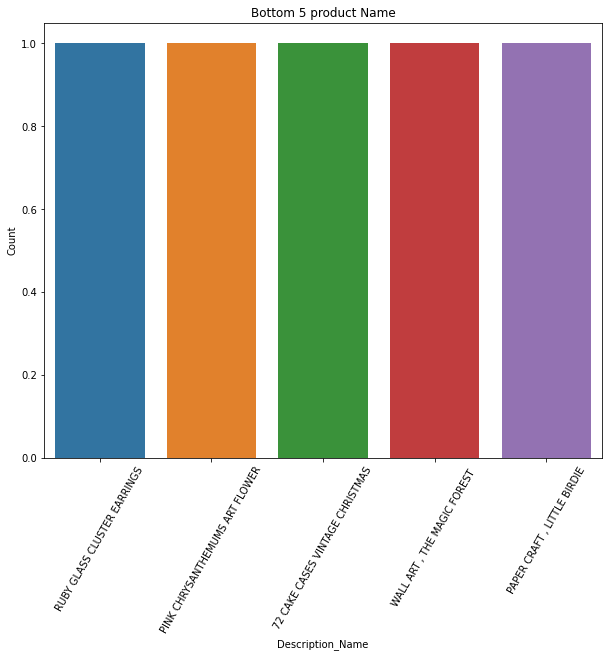

In [28]:
# Chart - 2 plot of Bottom 5 product Name
plt.figure(figsize=(10,8))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])
plt.xticks(rotation=60)
plt.show()

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily.

##### 2. What is/are the insight(s) found from the chart?

**Bottom 5 Product based on the selling are:**

1.LIGHT DECORATION BATTERY OPERATED	

2.Water damaged	

3.throw away	

4.re dotcom quick fix.	

5.BIRTHDAY BANNER TAPE

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [29]:
Stockcode_df = data['StockCode'].value_counts().reset_index()
Stockcode_df.rename(columns={'index':'StockCode_Name', 'StockCode':'Count'}, inplace=True)
Stockcode_df.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


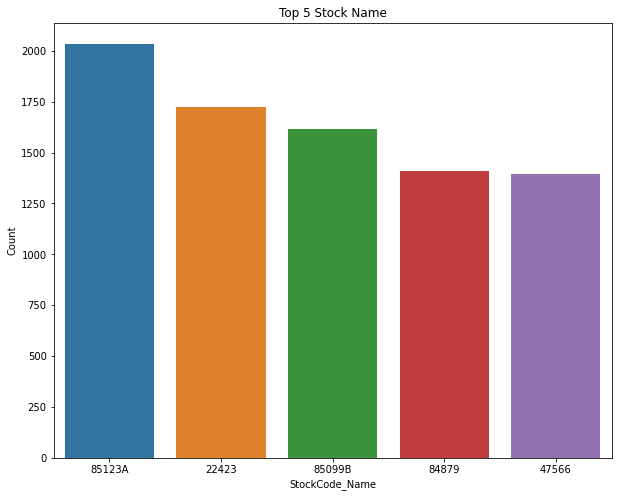

In [30]:
# Chart - 3 Plot of Top 5 Stock Name
plt.figure(figsize=(10,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name', y='Count', data=Stockcode_df[:5])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Top 5 Stock name based on selling are :**

1.85123A

2.22423

3.85099B	

4.47566

5.20725

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, above plot help creaeting positive business impact. It shows Top 5 stocks that are mostly sale.


#### Chart - 4

In [31]:
Stockcode_df.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


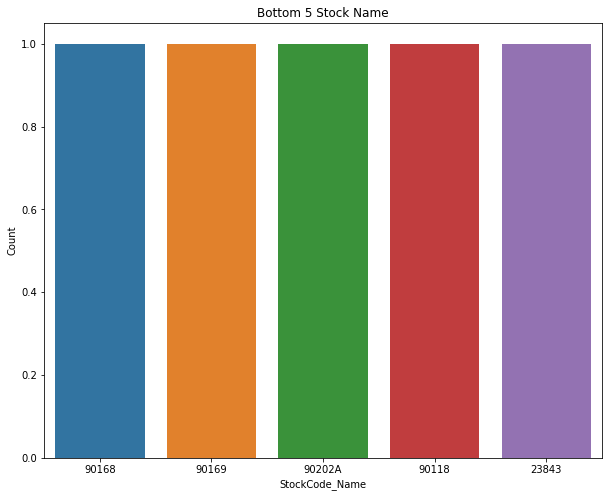

In [32]:
# Chart - 4 Plot of Bottom 5 Stock Name
plt.figure(figsize=(10,8))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name', y='Count', data=Stockcode_df[-5:])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Bottom 5 Stock Name Based on Selling are :**

1) 90168

2) 90169

3) 90202A

4) 90118

5) 23843

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [33]:
Country_df = df['Country'].value_counts().reset_index()
Country_df.rename(columns={'index':'Country_Name', 'Country':'Count'}, inplace=True)
Country_df.head()

,Country_Name,Count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


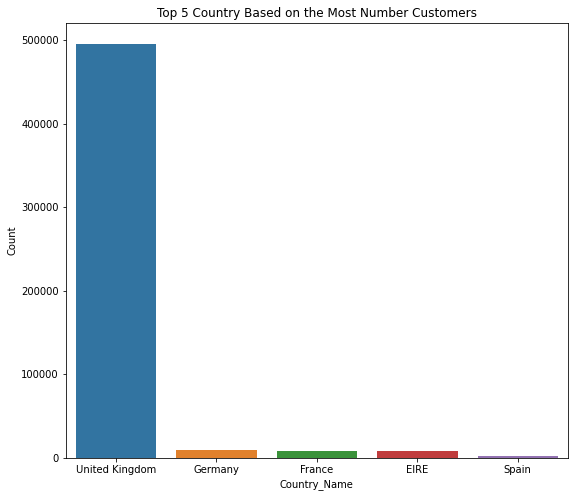

In [34]:
# Chart - 5 Plot of Top 5 Country having maximum number of customers
plt.figure(figsize=(9,8))
plt.title('Top 5 Country Based on the Most Number Customers')
sns.barplot(x='Country_Name', y='Count', data=Country_df[:5])
plt.show()

In [35]:
# checking the transaction % in UK
uk_trnsc = round(len(df[df['Country']=='United Kingdom']) / len(df) * 100,2)
print(f"{uk_trnsc}% transaction are from United Kingdom")

91.43% transaction are from United Kingdom


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

- From this graph we can see that **most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain**
- **91.43% transaction are from United Kingdom**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Above plot help creating positive business impact. From the above plot we can conclude the selling done with respect to the countries 

#### Chart - 6

In [36]:
Country_df.tail()

,Country_Name,Count
33,Lithuania,35
34,Brazil,32
35,Czech Republic,30
36,Bahrain,19
37,Saudi Arabia,10


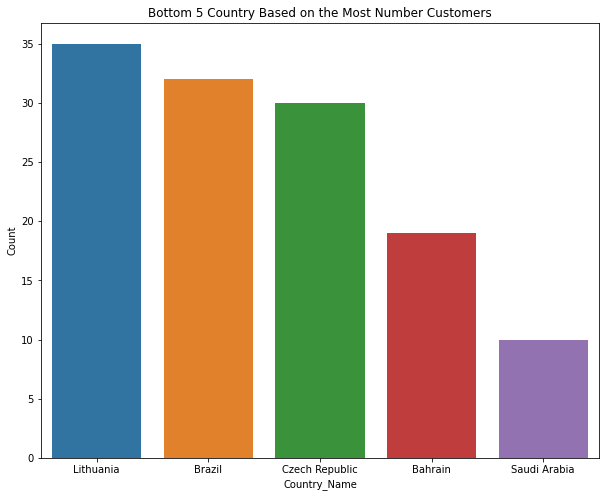

In [37]:
# Chart - 6 Plot of Bottom 5 Country having maximum number of customers
plt.figure(figsize=(10,8))
plt.title('Bottom 5 Country Based on the Most Number Customers')
sns.barplot(x='Country_Name', y='Count', data=Country_df[-5:])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From this graph we can see that **least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In order to create positive business impact,the customers are less in above counties so  we need to increase thr sales in above mentioned countries.

#### Chart - 7

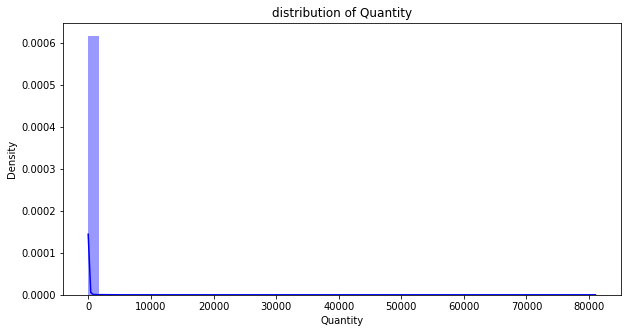

In [38]:
# Chart - 7 #distribution of Quantity
plt.figure(figsize=(10,5))
plt.title('distribution of Quantity')
sns.distplot(data['Quantity'],color="Blue")
plt.show()

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. 

##### 2. What is/are the insight(s) found from the chart?

- Quantity column shows Positively skewed (or right-skewed) distribution.
- The graph showing that most of the quantity distribution is at zero, which is not possible.
- We need to apply log tranformation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

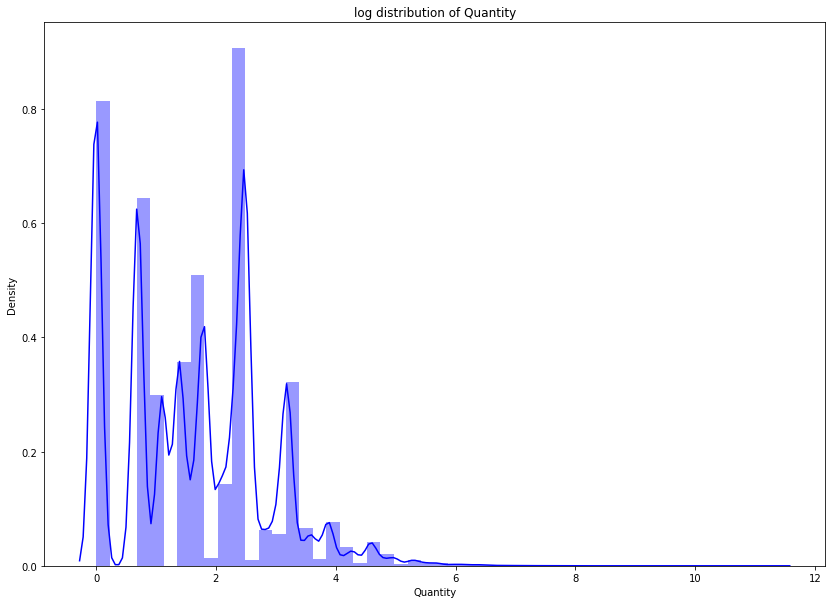

In [39]:
# Chart - 8 applying log transformation
plt.figure(figsize=(14,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(data['Quantity']),color="blue")
plt.show()

##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. 

##### 2. What is/are the insight(s) found from the chart?

After applying log transfromation, we can conclude quanitities are now sclaed from zero.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<AxesSubplot:title={'center':'distribution of UnitPrice'}, xlabel='UnitPrice', ylabel='Density'>

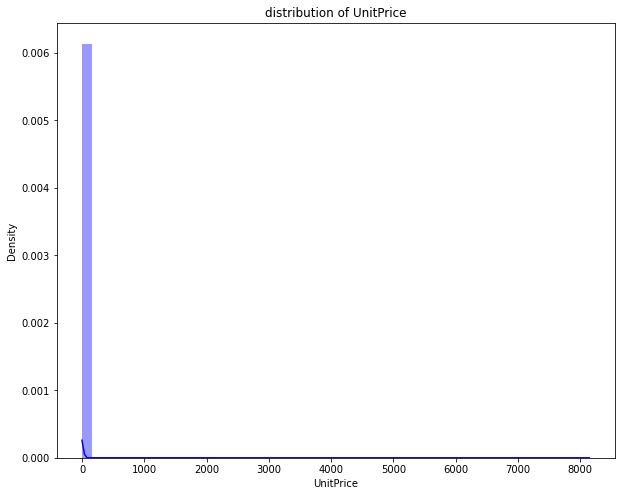

In [40]:
# Chart - 9 distribution of UnitPrice
plt.figure(figsize=(10,8))
plt.title('distribution of UnitPrice')
sns.distplot(data['UnitPrice'], color="blue")

In [41]:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [42]:
data = data[data['UnitPrice']>0]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **Feature Engineering**

### **Convert InvoiceDate column into datetime format**

In [43]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format="%Y-%m-%d %H:%M:%S")

### **Create a new feature Day from InvoiceDate**

In [44]:
data['Day'] = data['InvoiceDate'].dt.day_name()

### **Create some new features from Invoicedate like hours,year,month_num,day_num**

In [45]:
data['year'] = data['InvoiceDate'].apply(lambda x: x.year)
data['month'] = data['InvoiceDate'].apply(lambda x: x.month)
data['Month_name'] = data['InvoiceDate'].dt.month_name()
data['day'] = data['InvoiceDate'].apply(lambda x: x.day)
data['hours'] = data['InvoiceDate'].apply(lambda x: x.hour)
data['minutes'] = data['InvoiceDate'].apply(lambda x: x.minute)

### **Create a new features TotalAmount from form product of Quantity and Unitprice**

In [46]:
data['Total_Amount'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,Month_name,day,hours,minutes,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,20.34


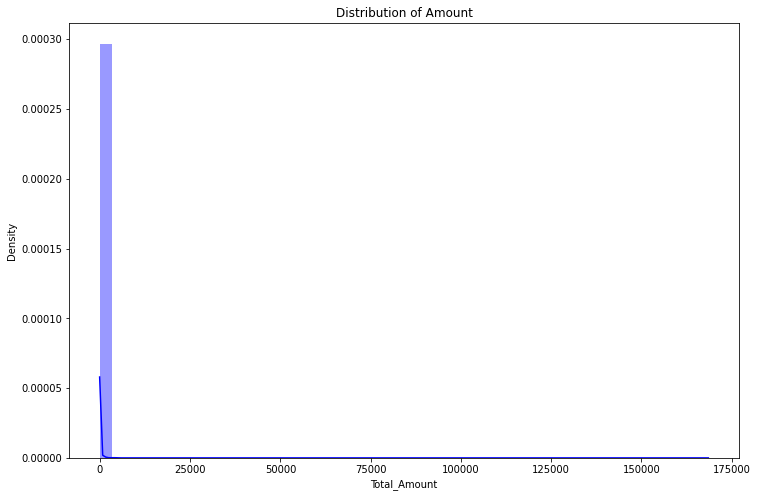

In [47]:
# Plotting Distribution of TotalAmount
plt.figure(figsize=(12,8))
plt.title("Distribution of Amount")
sns.distplot(data['Total_Amount'], color="blue")
plt.show()

In [48]:
data['Total_Amount'].describe()

count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: Total_Amount, dtype: float64

#### Chart - 10

In [49]:
day_df=data['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name','Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


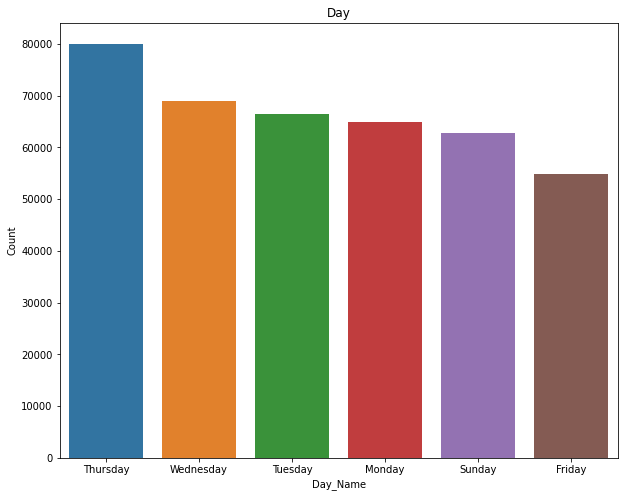

In [50]:
# Chart - 10 # plotting Bargrap of count of Days
plt.figure(figsize=(10,8))
plt.title("Day")
sns.barplot(x='Day_Name', y='Count', data=day_df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Most of the customers have purches the items in Thursday ,Wednesday and Tuesday**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, above gain insight help creating positive business impact.

#### Chart - 11

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397884 non-null  object        
 1   StockCode     397884 non-null  object        
 2   Description   397884 non-null  object        
 3   Quantity      397884 non-null  int64         
 4   InvoiceDate   397884 non-null  datetime64[ns]
 5   UnitPrice     397884 non-null  float64       
 6   CustomerID    397884 non-null  float64       
 7   Country       397884 non-null  object        
 8   Day           397884 non-null  object        
 9   year          397884 non-null  int64         
 10  month         397884 non-null  int64         
 11  Month_name    397884 non-null  object        
 12  day           397884 non-null  int64         
 13  hours         397884 non-null  int64         
 14  minutes       397884 non-null  int64         
 15  Total_Amount  397

In [52]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,Month_name,day,hours,minutes,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,December,1,8,26,20.34


In [53]:
month_df = data['Month_name'].value_counts().reset_index()
month_df.rename(columns={'index':'Month_Name', 'Month_name':'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


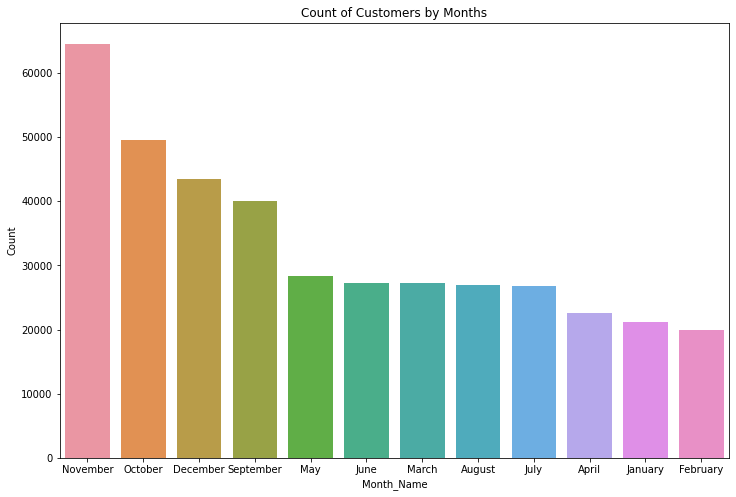

In [54]:
# Chart - 11 plot of no. of customers by months
plt.figure(figsize=(12,8))
plt.title('Count of Customers by Months')
sns.barplot(x='Month_Name', y='Count', data=month_df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

- **Most numbers of customers have purches the gifts in the month of November ,October and December September**
- **less numbers of customers have purches the gifts in the month of April ,january and February**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact

#### Chart - 12

In [55]:
hour_df = data['hours'].value_counts().reset_index()
hour_df.rename(columns={'index':'Total_hours', 'hours':'Count'}, inplace=True)
hour_df


,Total_hours,Count
0,12,72065
1,13,64026
2,14,54118
3,11,49084
4,15,45369
5,10,37997
6,16,24089
7,9,21944
8,17,13071
9,8,8690


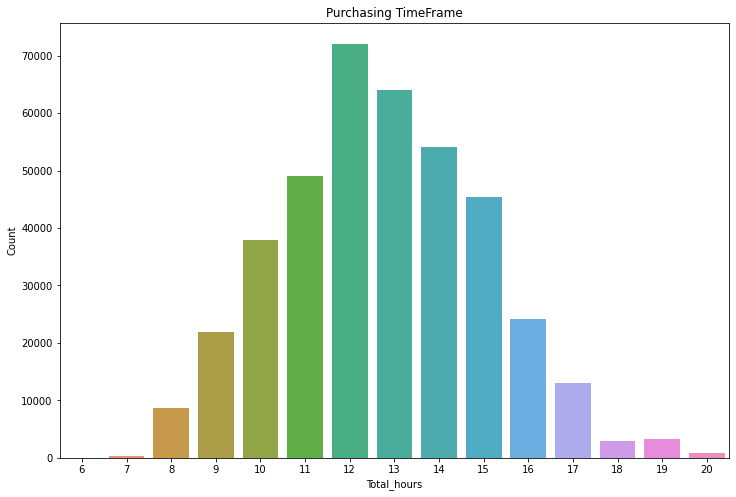

In [56]:
# Chart - 12 visualization code
plt.figure(figsize=(12,8))
plt.title('Purchasing TimeFrame')
sns.barplot(x='Total_hours', y='Count', data=hour_df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

- **Most of the customers used to shopping in between the Time-Frame of 10:00 am - 05:00 pm**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [57]:
def day_type(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'    

In [58]:
data['Day_type'] = data['hours'].apply(day_type)

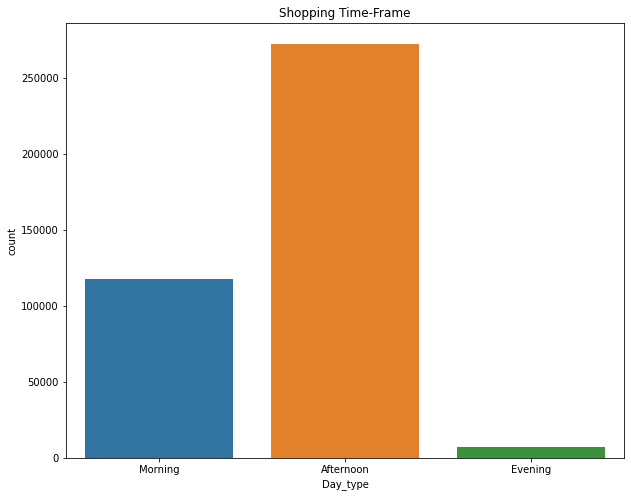

In [59]:
# Chart - 13 visualization code
plt.figure(figsize=(10,8))
plt.title("Shopping Time-Frame")
sns.countplot(x='Day_type', data=data)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

- **Most of the customers have purchase the items in Afternoon ,moderate numbers of customers have purchase the items in Morning and least numbers of customers have purchase the items in Evening**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact

## ***6. Feature Engineering & Data Pre-processing***

## **No need for Feature Engineering as I have done this earlier**

# **Create the RFM model (Recency, Frequency,Monetary value)**

**The RFM model is a customer segmentation framework used in marketing to identify and categorize customers based on their transactional behavior. RFM stands for Recency, Frequency, and Monetary value, which are the three key indicators used in this model to evaluate customer behavior.**

- **Recency: This measures how recently a customer has made a purchase.**
- **Frequency: This measures how often a customer has made a purchase.**
- **Monetary value: This measures the total amount of money a customer has spent on purchases. Customers who spend more money are considered to be more valuable to the business.**

**Performing RFM Segmentation and RFM Analysis, Step by Step**

- The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.
- The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.

**Calculating RFM scores -**
- The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. 
-Generally speaking, the higher the RFM score, the more valuable the customer.



In [60]:
max(data['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [61]:
print(data.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Day', 'year', 'month',
       'Month_name', 'day', 'hours', 'minutes', 'Total_Amount', 'Day_type'],
      dtype='object')


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397884 non-null  object        
 1   StockCode     397884 non-null  object        
 2   Description   397884 non-null  object        
 3   Quantity      397884 non-null  int64         
 4   InvoiceDate   397884 non-null  datetime64[ns]
 5   UnitPrice     397884 non-null  float64       
 6   CustomerID    397884 non-null  float64       
 7   Country       397884 non-null  object        
 8   Day           397884 non-null  object        
 9   year          397884 non-null  int64         
 10  month         397884 non-null  int64         
 11  Month_name    397884 non-null  object        
 12  day           397884 non-null  int64         
 13  hours         397884 non-null  int64         
 14  minutes       397884 non-null  int64         
 15  Total_Amount  397

In [75]:
# setting reference date as 2011-12-10
latest_date = dt.datetime(2011,12,10) 

# checking recent purchase
recency_df = data.groupby("CustomerID")['InvoiceDate'].max().reset_index()
recency_df.rename(columns={'InvoiceDate':'recent_purchase'}, inplace=True)
recency_df.head()



,CustomerID,recent_purchase
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [76]:
# Calculate recency 
recency_df['Recency'] = recency_df['recent_purchase'].apply(lambda x: (latest_date - x).days)
recency_df.head()

,CustomerID,recent_purchase,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12347.0,2011-12-07 15:52:00,2
2,12348.0,2011-09-25 13:13:00,75
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,310


In [97]:
#Descriptive Statistics (Recency)
recency_df.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

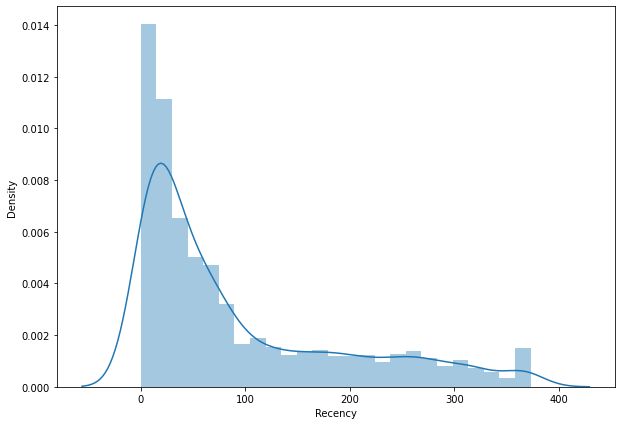

In [79]:
# Recency distribtuion plot
plt.figure(figsize=(10,7))
sns.distplot(recency_df['Recency']);

#### **We can see that there are more customers who have purchased recently and the graph decrease furthur.**

## **Frequency**

**Frequency will helps us to know how many times a customer has purchased.**

In [89]:
frequency_df = data.groupby('CustomerID').agg({'InvoiceNo': 'count'}).reset_index()
frequency_df.rename(columns={'InvoiceNo':'Frequency'}, inplace= True)
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [98]:
#Descriptive Statistics (Frequency)
frequency_df['Frequency'].describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

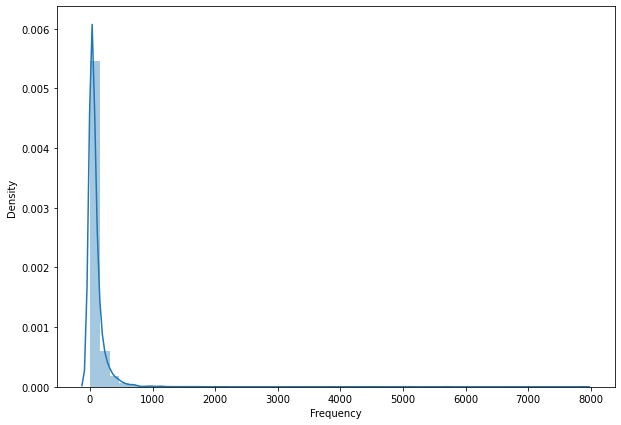

In [91]:
# Frequency Distribution plot
plt.figure(figsize=(10,7))
sns.distplot(frequency_df['Frequency']);

## **Monetary**

**This measures the total amount of money a customer has spent on purchases.**

In [92]:
monetary_df = data.groupby('CustomerID').agg({'Total_Amount': 'sum'}).reset_index()
monetary_df.rename(columns={'Total_Amount': 'Monetary'}, inplace= True)
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [99]:
#Descriptive Statistics (Frequency)
monetary_df.Monetary.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

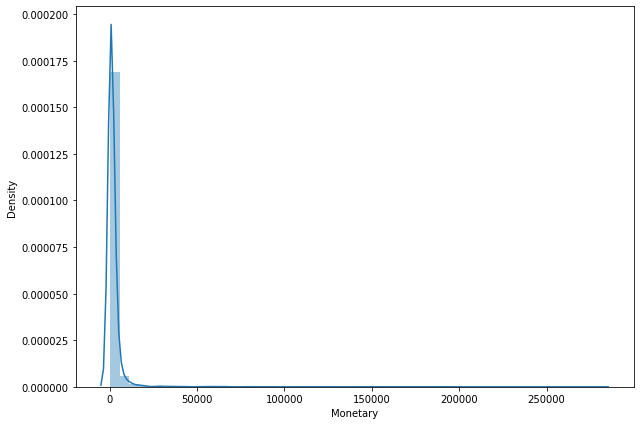

In [93]:
# Monetary distribution plot
plt.figure(figsize=(10,7))
sns.distplot(monetary_df['Monetary']);

## **Combinind Recency, Frequency and Monetary**

In [95]:
# Combining Recency, Frequency and Monetary
rfm_df  = recency_df.merge(frequency_df, how='outer')
rfm_df = rfm_df.merge(monetary_df, how='outer')
rfm_df.drop('recent_purchase', axis=1, inplace=True)
rfm_df.set_index('CustomerID', inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


## **Split into Four Segment Using Quantiles**

In [104]:
# split into four segment using quantiles
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.00,17.0,307.415
0.50,50.00,41.0,674.485
0.75,141.75,100.0,1661.740


- **We will assign the score from 1 to 4 on the basis of recency, frequency and monetary based on there quartiles. 4 being the best score and 1 being the worst score. A final score will be calculated simply by combining individual RFM scores.**

- **Higher recency is bad so it will get the lesser score but in case of frequency and monetary higher values are good so they will get higher scores.**

In [105]:
# Function to create R, F and M segments

def RScoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.50]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.50]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1          

In [106]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


**We can see best recency i.e customer with most recently purchase has R=4 score and same is with Frequency and Monetary**

**We will combine the scores to create a single rfm score**

In [107]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


### **Analyzing RFM score distribution and segmenting them manually as Good, average and Bad customers**

In [109]:
def create_segment(df):
  if df['RFMScore'] >= 9:
    return 'Good'
  elif (df['RFMScore'] >= 5) and (df['RFMScore'] < 9):
    return 'Average'
  else:
    return ' Bad'    

In [111]:
rfm_df['Segment'] = rfm_df.apply(create_segment, axis=1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Segment
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Good
12347.0,2,182,4310.00,1,1,1,111,3,Bad
12348.0,75,31,1797.24,3,3,1,331,7,Average
12349.0,18,73,1757.55,2,2,1,221,5,Average
12350.0,310,17,334.40,4,4,3,443,11,Good


## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***